In [1]:
import numpy as np
import pandas as pd
import seaborn


In [2]:
t = seaborn.load_dataset('titanic')
t.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
#  Tasks: The exercise is to answer the following questions.

In [4]:
# Q-1 :  How many passengers are described in the data set?

num_passengers = len(t)
print(f'There are {num_passengers} passengers described in the dataset.')

There are 891 passengers described in the dataset.


In [5]:
# Q-2 : How many distinct values are in who column?

num_distinct_who_values = t['who'].nunique()
print(f'There are {num_distinct_who_values} distinct values in the "who" column.')

There are 3 distinct values in the "who" column.


In [6]:
# Q-3 : How many missing values do you fnd in each data column?

missing_values = t.isna().sum()
print('Missing values in each data column:',missing_values)

Missing values in each data column: survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [7]:
# Q-4 : Does the data contain passengers over 60 old? How many?

passengers_over_60 = t[t['age'] > 60]
num_passengers_over_60 = len(passengers_over_60)

if num_passengers_over_60 > 0:
    print(f'Yes, there are {num_passengers_over_60} passengers over 60 years old.')
else:
    print('No passengers over 60 years old found in the dataset.')

Yes, there are 22 passengers over 60 years old.


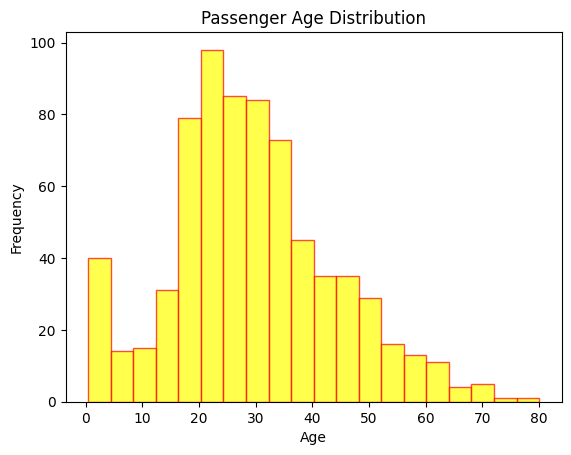

In [11]:
# Q-5 : What is the passenger age distribution? (Plot it.)

import matplotlib.pyplot as plt
age_data = t['age'].dropna()
# Create a histogram
plt.hist(age_data, bins=20, edgecolor='red', alpha=0.7,color='yellow')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Passenger Age Distribution')

# Show the plot
plt.show()


In [12]:
# Q-6 :  What are the 3-quantiles of the passenger age distribution?

# Calculate quartiles
q1 = age_data.quantile(0.25)
q2 = age_data.quantile(0.50)
q3 = age_data.quantile(0.75)

print(f'1st Quartile (Q1): {q1}')
print(f'2nd Quartile (Q2): {q2}')
print(f'3rd Quartile (Q3): {q3}')


1st Quartile (Q1): 20.125
2nd Quartile (Q2): 28.0
3rd Quartile (Q3): 38.0


In [13]:
# Q-7 :  How will you drop all passengers with no embarked data?

t_cleaned = t.dropna(subset=['embarked'])

In [14]:
# Q-8 : What is the average, minimum, and maximum fares paid by the passengers?

average_fare = t['fare'].mean()
minimum_fare = t['fare'].min()
maximum_fare = t['fare'].max()

print(f'Average Fare: {average_fare}')
print(f'Minimum Fare: {minimum_fare}')
print(f'Maximum Fare: {maximum_fare}')

Average Fare: 32.204207968574636
Minimum Fare: 0.0
Maximum Fare: 512.3292


In [15]:
# Q-9 : What are the proportions of passengers in different classes?

class_proportions = t['pclass'].value_counts(normalize=True) * 100

print('Proportions of passengers in different classes:')
print(class_proportions)

Proportions of passengers in different classes:
3    55.106622
1    24.242424
2    20.650954
Name: pclass, dtype: float64


In [16]:
# Q-10 : What is the female to male ratio in each travel class?

# Group the data by 'sex' and 'pclass' and calculate the counts
gender_counts = t.groupby(['sex', 'pclass']).size().reset_index(name='count')

# Pivot the table to have 'sex' as columns
gender_counts_pivot = gender_counts.pivot(index='pclass', columns='sex', values='count')

# Calculate the female to male ratio
female_to_male_ratio = gender_counts_pivot['female'] / gender_counts_pivot['male']

print('Female to Male Ratio in Each Travel Class:')
print(female_to_male_ratio)


Female to Male Ratio in Each Travel Class:
pclass
1    0.770492
2    0.703704
3    0.414986
dtype: float64


In [17]:
# Q-11 :  What fraction survived?

total_passengers = len(t)

# Calculate the number of survivors
survived_passengers = t['survived'].sum()

# Calculate the fraction of passengers who survived
survival_fraction = survived_passengers / total_passengers

print(f'The fraction of passengers who survived is: {survival_fraction:.2f}')


The fraction of passengers who survived is: 0.38


In [22]:
#  Q-12 :  Are the survival rates of male and female passengers different?

# Calculate survival rates for male and female passengers
survival_rate_male = t[t['sex'] == 'male']['survived'].mean()
survival_rate_female = t[t['sex'] == 'female']['survived'].mean()

# Print out the survival rates
print(f'Survival rate for male passengers: {survival_rate_male:.2f}')
print(f'Survival rate for female passengers: {survival_rate_female:.2f}')

# conclusion
if survival_rate_male == survival_rate_female :
    print(f'Hence  the survival rates of male and female passengers is not different.')
else:
    print(f'Hence the survival rates of male and female passengers is  different.')

Survival rate for male passengers: 0.19
Survival rate for female passengers: 0.74
Hence the survival rates of male and female passengers is  different.


In [23]:

# Q-13 : Are the survival rates of frst, second, and third class passengers different?

# Calculate survival rates for each class
survival_rate_first_class = t[t['pclass'] == 1]['survived'].mean()
survival_rate_second_class = t[t['pclass'] == 2]['survived'].mean()
survival_rate_third_class = t[t['pclass'] == 3]['survived'].mean()

print(f'Survival rate for first class passengers: {survival_rate_first_class:.2f}')
print(f'Survival rate for second class passengers: {survival_rate_second_class:.2f}')
print(f'Survival rate for third class passengers: {survival_rate_third_class:.2f}')

# Conclusion
if survival_rate_first_class == survival_rate_second_class == survival_rate_third_class :
    print(f'Hence the survival rates of first, second, and third class passengers are not different .')
else:
    print(f'Hence the survival rates of first, second, and third class passengers are different .')

Survival rate for first class passengers: 0.63
Survival rate for second class passengers: 0.47
Survival rate for third class passengers: 0.24
Hence the survival rates of first, second, and third class passengers are different .


In [25]:
# Q-14 : How can one print a table of survival rate dependencies on class and gender?

survival_rates = t.groupby(['pclass', 'sex'])['survived'].mean()

# Create a pivot table to format the data
survival_table = survival_rates.reset_index().pivot_table(index='pclass', columns='sex', values='survived')

# Print the table
print(survival_table)

sex       female      male
pclass                    
1       0.968085  0.368852
2       0.921053  0.157407
3       0.500000  0.135447


In [27]:
# Q-15 : How can one print a table with number of survivors and average fare for each gender  and cabin?

survivors_fare_stats = t.groupby(['sex', 'deck']).agg({'survived': 'sum', 'fare': 'mean'})
print(survivors_fare_stats)



             survived        fare
sex    deck                      
female A            1   39.600000
       B           27  115.803085
       C           24  117.226541
       D           18   60.776628
       E           14   56.414167
       F            5   19.071660
       G            2   13.581250
male   A            6   39.625593
       B            8  110.404380
       C           11   85.744141
       D            7   53.006113
       E           10   36.861276
       F            3   18.462500
       G            0         NaN
